In [1]:
# Import the torch module
import torch

# Tensors are views of a Storage instance

>- **Values in tensors** are allocated in **contiguous chunks** of memory managed by torch.UntypedStorage instances.

> - A **Tensor instance** is a **view of such a Storage instance** that is capable of indexing into that storage using an **offset** and per-dimension **strides**.

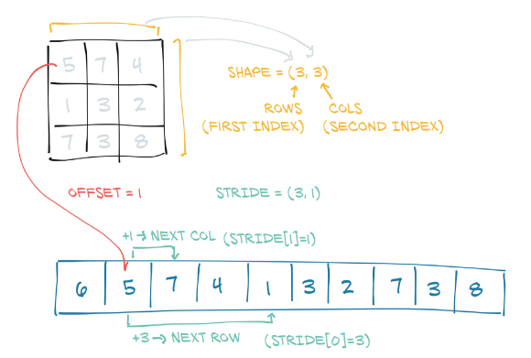

In [2]:
a = torch.tensor([[5.0, 7.0, 4.0], [1.0, 3.0, 2.0], [7.0, 3.0, 8.0]])
print('a-->', a)
print('a.shape-->', a.shape)
print()

# Even though the tensor reports itself as having three rows and three columns, the storage under the hood is a contiguous array of size 9
# as noted at https://pytorch.org/docs/stable/storage.html, all storage classes except for torch.UntypedStorage will be removed in the future,
# and torch.UntypedStorage will be used in all cases.
print('layout of tensor values in storage:')
print(a.storage())
print()

# torch.UntypedStorage presents the tensor data as an untyped array of bytes. (4 bytes * 9 tensor elements = 36 bytes).
# Notice that all storage classes except for torch.UntypedStorage will be removed in the future, and torch.UntypedStorage will be used in all cases.
print('the corresponding demical value of each byte in the contiguous array of a :')
print(a.untyped_storage())
print()

print('address of storage instance:')
print(a.untyped_storage().data_ptr())
print()

print('address of tensor a:')
print(a.data_ptr())

a--> tensor([[5., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]])
a.shape--> torch.Size([3, 3])

layout of tensor values in storage:
 5.0
 7.0
 4.0
 1.0
 3.0
 2.0
 7.0
 3.0
 8.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 9]

the corresponding demical value of each byte in the contiguous array of a :
 0
 0
 160
 64
 0
 0
 224
 64
 0
 0
 128
 64
 0
 0
 128
 63
 0
 0
 64
 64
 0
 0
 0
 64
 0
 0
 224
 64
 0
 0
 64
 64
 0
 0
 0
 65
[torch.storage.UntypedStorage(device=cpu) of size 36]

address of storage instance:
101609308207104

address of tensor a:
101609308207104


<ipython-input-2-9e1a51fcab0d>:10: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(a.storage())


# Multiple Tensors Index the Same Storage Instance

Multiple tensors can index the same storage, even if they index into the data differently.
> - storage stores data
> - tensor is a data structure (with metadata to index into a storage)

Notes:
> - This design between Tensor and Storage makes some operations inexpensive, like transposing a tensor or extracting a subtensor, because they do not lead to memory reallocations. Instead, they consist of allocating a new Tensor object with a different value for size, storage offset, or stride.
> - Changing the value of a tensor has a side effect on other tensors that refers to the same storage.

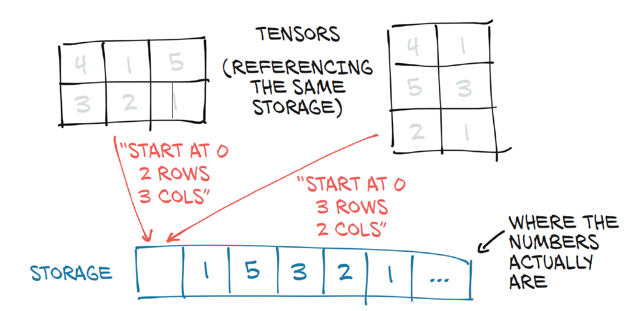

In [3]:
# tensor a and tensor b refer to the same storage
a = torch.tensor([[4.0, 1.0, 5.0], [3.0, 2.0, 1.0]])
print('a-->',a)
print('a.shape-->',a.shape)
print()

print('address of storage instance:')
print(a.untyped_storage().data_ptr())
print()

b = a.transpose(0, 1)
print('b-->', b)
print('b.shape-->', b.shape)
print()

print('address of storage instance:')
print(b.untyped_storage().data_ptr())
print()


# change the content of a leads to the same change on b.
a[1,1] = 0.0

print('a-->', a)
print('b-->', b)

a--> tensor([[4., 1., 5.],
        [3., 2., 1.]])
a.shape--> torch.Size([2, 3])

address of storage instance:
101609308279424

b--> tensor([[4., 3.],
        [1., 2.],
        [5., 1.]])
b.shape--> torch.Size([3, 2])

address of storage instance:
101609308279424

a--> tensor([[4., 1., 5.],
        [3., 0., 1.]])
b--> tensor([[4., 3.],
        [1., 0.],
        [5., 1.]])


# Tensor metadata: Size, offset, and stride

In order to index into a storage, tensors rely on a few pieces of information:

> - **Size**:  indicating how many elements across each dimension the tensor represents
> - **Offset**: the index in the storage corresponding to the first element in the tensor
> - **Stride**: the number of elements in the storage that need to be skipped over to obtain the next element along each dimension

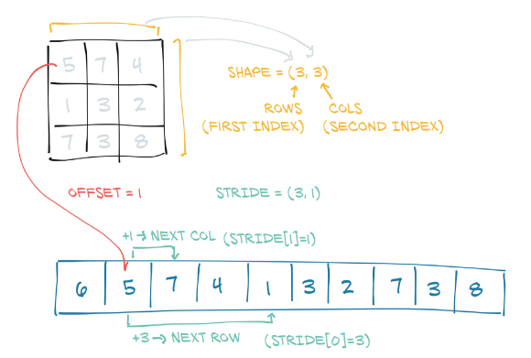

The **stride** is a tuple indicating the number of elements in the storage that have to be skipped when the index is increased by 1 in each dimension

For example, given a 2D tensor T, accessing an element **T[i, j]** results in accessing the **storage_offset + stride[0] * i + stride[1] * j** element in the storage

In [4]:
a = torch.tensor([[5.0, 7.0, 4.0], [1.0, 3.0, 2.0], [7.0, 3.0, 8.0]])
print(a)
print('address of storage instance for tensor a:', a.untyped_storage().data_ptr())

# check the size via .size() or .shape
print('a.size()-->', a.size())
print('a.shape-->', a.shape)

# check the offset
print('a.storage_offset()-->', a.storage_offset())

# check the stride
print('a.stride()-->', a.stride())
print()

b = a[1]
print('b-->', b)
print('address of storage instance for tensor b:', b.untyped_storage().data_ptr())
print('b.size()-->', b.size())
print('b.storage_offset()-->', b.storage_offset())
print('b.stride()-->', b.stride())
print()

c = a[:,1]
print('c-->', c)
print('address of storage instance for tensor c:', c.untyped_storage().data_ptr())
print('c.size()-->', c.size())
print('c.storage_offset()-->', c.storage_offset())
print('c.stride()-->', c.stride())
print()

d = a[1,2]
print('d-->', d)
print('address of storage instance for tensor d:', d.untyped_storage().data_ptr())
print('d.size()-->', d.size())
print('d.storage_offset()-->', d.storage_offset())
print('d.stride()-->', d.stride())

tensor([[5., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]])
address of storage instance for tensor a: 101609308286912
a.size()--> torch.Size([3, 3])
a.shape--> torch.Size([3, 3])
a.storage_offset()--> 0
a.stride()--> (3, 1)

b--> tensor([1., 3., 2.])
address of storage instance for tensor b: 101609308286912
b.size()--> torch.Size([3])
b.storage_offset()--> 3
b.stride()--> (1,)

c--> tensor([7., 3., 3.])
address of storage instance for tensor c: 101609308286912
c.size()--> torch.Size([3])
c.storage_offset()--> 1
c.stride()--> (3,)

d--> tensor(2.)
address of storage instance for tensor d: 101609308286912
d.size()--> torch.Size([])
d.storage_offset()--> 5
d.stride()--> ()


# Contiguous Tensors

Definition of contiguous
> - **A tensor whose values are laid out in the storage starting from the rightmost dimension onward (that is, moving along rows for a 2D tensor) is defined as contiguous.**

Contiguous tensors are convenient because we can visit them efficiently in order without jumping around in the storage (improving data locality improves performance because of the way memory access works on modern CPUs).

Some tensor operations in PyTorch only work on contiguous tensors, such as view.  In that case, PyTorch will throw an informative exception and require us to call contiguous explicitly.

We can obtain a new contiguous tensor from a non-contiguous one using the **".contiguous()"** method. It’s worth noting that calling contiguous() will do nothing (and will not hurt performance) if the tensor is already contiguous.

In [5]:
a = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])
print('a-->', a)
print('a.is_contiguous()-->',a.is_contiguous())
print()

print('layout of tensor values in storage:')
print(a.storage())
print()

# If we look at the strides, we see, that we would have to skip 3 values to go to the new row, while only 1 to go to the next column.
# That makes sense so far. The values are stored sequentially in memory, i.e. the memory cells should hold the data as [1.0, 2.0, 3.0, 4.0, ..., 9.0].
# https://discuss.pytorch.org/t/contigious-vs-non-contigious-tensor/30107/2
print('a.stride()-->', a.stride())

a--> tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
a.is_contiguous()--> True

layout of tensor values in storage:
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0
 7.0
 8.0
 9.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 9]

a.stride()--> (3, 1)


In [6]:
a = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]])

a_t = a.t()  # get its transpose
print('a_t-->', a_t)
print('a_t.is_contiguous()-->',a_t.is_contiguous())
print()

print('layout of tensor values in storage:')
print(a_t.storage())
print()

print('a_t.stride()-->', a_t.stride())
print()

# obtain a new contiguous tensor from a non-contiguous one using the contiguous method.
a_t_cont = a_t.contiguous()
print('a_t_cont-->', a_t_cont)
print('a_t_cont.is_contiguous()-->',a_t_cont.is_contiguous())
# Notice that the stride has been changed to reflect the new layout.
print('a_t_cont.stride()-->', a_t_cont.stride())
print()

# Notice that the storage has been reshuffled in order for elements to be laid out rowby- row in the new storage.
print('layout of tensor values in storage:')
print(a_t_cont.storage())
print()

# it is a deep copy by is_contiguous()
print('address of storage instance for tensor a_t:', a_t.untyped_storage().data_ptr())
print('address of storage instance for tensor a_t_cont:', a_t_cont.untyped_storage().data_ptr())

a_t--> tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])
a_t.is_contiguous()--> False

layout of tensor values in storage:
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0
 7.0
 8.0
 9.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 9]

a_t.stride()--> (1, 3)

a_t_cont--> tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]])
a_t_cont.is_contiguous()--> True
a_t_cont.stride()--> (3, 1)

layout of tensor values in storage:
 1.0
 4.0
 7.0
 2.0
 5.0
 8.0
 3.0
 6.0
 9.0
[torch.storage.TypedStorage(dtype=torch.float32, device=cpu) of size 9]

address of storage instance for tensor a_t: 101609308308672
address of storage instance for tensor a_t_cont: 101609308297664


# torch.tensor.clone vs torch.tensor.detach

>- **torch.tensor.clone:** This function returns a deep-copy of a tensor. However, this operation is differentiable, so gradients will flow back from the result of this operation to input. To create a tensor without an autograd relationship to input see detach().
https://pytorch.org/docs/stable/generated/torch.clone.html
https://pytorch.org/docs/stable/generated/torch.Tensor.clone.html

>- **torch.tensor.detach:** Returns a new Tensor, detached from the current graph. The new created Tensor **shares** the same storage with the original one, but **never** requires gradient.

tensor([[5., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]], requires_grad=True)
address of storage instance for tensor a: 101609308307840
a.size()--> torch.Size([3, 3])
a.shape--> torch.Size([3, 3])
a.storage_offset()--> 0
a.stride()--> (3, 1)
a.requires_grad--> True

b--> tensor([[5., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]], grad_fn=<CloneBackward0>)
address of storage instance for tensor b: 101609308316288
b.size()--> torch.Size([3, 3])
b.storage_offset()--> 0
b.stride()--> (3, 1)
b.requires_grad--> True

a--> tensor([[5., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]], requires_grad=True)
b--> tensor([[4., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]], grad_fn=<CopySlices>)
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=ec2ca5aea987e5ed017f06e06090ba335c7aebefce17e13292695931965e728a
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085

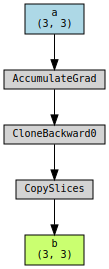

In [7]:
a = torch.tensor([[5.0, 7.0, 4.0], [1.0, 3.0, 2.0], [7.0, 3.0, 8.0]], requires_grad=True)
print(a)
print('address of storage instance for tensor a:', a.untyped_storage().data_ptr())

# check the size via .size() or .shape
print('a.size()-->', a.size())
print('a.shape-->', a.shape)


# check the offset
print('a.storage_offset()-->', a.storage_offset())

# check the stride
print('a.stride()-->', a.stride())

# check the requires_grad
print('a.requires_grad-->', a.requires_grad)
print()


b = a.clone()
print('b-->', b)
print('address of storage instance for tensor b:', b.untyped_storage().data_ptr())
print('b.size()-->', b.size())
print('b.storage_offset()-->', b.storage_offset())
print('b.stride()-->', b.stride())
print('b.requires_grad-->', b.requires_grad)
print()

b[0,0] = 4
print('a-->', a)
print('b-->', b)

# to visualize the computational graph
!pip install torchviz
from torchviz import make_dot
make_dot((a, b), params ={'a':a, 'b':b})

tensor([[5., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]], requires_grad=True)
address of storage instance for tensor a: 101609344375424
a.size()--> torch.Size([3, 3])
a.shape--> torch.Size([3, 3])
a.storage_offset()--> 0
a.stride()--> (3, 1)
a.requires_grad--> True

c--> tensor([[5., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]])
address of storage instance for tensor c: 101609344375424
c.size()--> torch.Size([3, 3])
c.storage_offset()--> 0
c.stride()--> (3, 1)
c.requires_grad--> False

a--> tensor([[4., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]], requires_grad=True)
c--> tensor([[4., 7., 4.],
        [1., 3., 2.],
        [7., 3., 8.]])


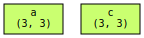

In [21]:
a = torch.tensor([[5.0, 7.0, 4.0], [1.0, 3.0, 2.0], [7.0, 3.0, 8.0]], requires_grad=True)
print(a)
print('address of storage instance for tensor a:', a.untyped_storage().data_ptr())

# check the size via .size() or .shape
print('a.size()-->', a.size())
print('a.shape-->', a.shape)

# check the offset
print('a.storage_offset()-->', a.storage_offset())

# check the stride
print('a.stride()-->', a.stride())

# check the requires_grad
print('a.requires_grad-->', a.requires_grad)
print()

c = a.detach()
print('c-->', c)
print('address of storage instance for tensor c:', c.untyped_storage().data_ptr())
print('c.size()-->', c.size())
print('c.storage_offset()-->', c.storage_offset())
print('c.stride()-->', c.stride())
print('c.requires_grad-->', c.requires_grad)
print()

c[0,0] = 4
print('a-->', a)
print('c-->', c)

make_dot((a, c), params ={'a':a, 'c':c})

# Moving Tensors to the GPU

So far, the storage we’ve talked about is the memory on the CPU. PyTorch tensors also can be transfered to **graphics processing units (GPUs)** in order to perform massively parallel, fast computations.

When a tenor is stored on GPUs, all operations that will be performed on the tensor will be carried out using GPU-specific routines that come with PyTorch.

**Note: PyTorch:  In almost all cases, CPU- and GPU-based tensors expose the same user-facing API**

## Managing a tensor’s device attribute
In addition to dtype, a PyTorch Tensor also has the notion of device, which is where on the computer the tensor data is placed.

If our machine has more than one GPU, we can also decide on which GPU we allocate the tensor by passing a zero-based integer identifying the GPU on the machine, such as

a_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device = 'cuda:0')

In [9]:
# Method (1): We can create a tensor on the GPU by specifying the corresponding argument to the constructor
a_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device = 'cuda')
print('a_gpu-->',a_gpu)

# For CUDA tensors, .get_device() returns the device ordinal of the GPU on which the tensor resides. For CPU tensors, this function returns -1.
print('a_gpu.get_device()-->', a_gpu.get_device())
print()

# Method (2): we can also copy a tensor created on the CPU onto the GPU using the to method
# doing so returns a new tensor that has the same numerical data, but stored in the RAM of the GPU, rather than in regular system RAM.
b = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
b_gpu = b.to(device='cuda')

print('b-->',b)
print('b.get_device()-->', b.get_device())
print('b_gpu-->',b_gpu)
print('b_gpu.get_device()-->', b_gpu.get_device())
print()

# Method (3): We can also use the shorthand methods ".cpu()" and ".cuda()" instead of the .to() method to achieve the same goal
c = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
c_gpu = c.cuda() # defaults to GPU index 0
d_gpu = c.cuda(0)

print('c-->',b)
print('c_gpu-->',c_gpu)
print('d_gpu-->',d_gpu)

a_gpu--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='cuda:0')
a_gpu.get_device()--> 0

b--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
b.get_device()--> -1
b_gpu--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='cuda:0')
b_gpu.get_device()--> 0

c--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
c_gpu--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='cuda:0')
d_gpu--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='cuda:0')


## Operations with GPU tensors
GPU tensors are not brought back to the CPU once the result has been computed. Here’s what happened in this line:
![8.png](attachment:48141874-7157-44f7-abd7-912bf26e1b42.png)

In [10]:
# At this point, any operation performed on a GPU tensor, such as multiplying all elements by a constant, is carried out on the GPU:
a_gpu = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]], device = 'cuda')
print('a_gpu-->',a_gpu)

result = a_gpu * 2  # result is located on GPU, and no information flows to the CPU
print('result-->', result)

a_gpu--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], device='cuda:0')
result--> tensor([[ 8.,  2.],
        [10.,  6.],
        [ 4.,  2.]], device='cuda:0')


## Moving the tensor back to CPU

In [11]:
# Method (1): use ".to(device='cpu')" method
result_cpu = result.to(device='cpu')
print('result_cpu-->', result_cpu)

# Method (2): use ".cpu()" method
another_result_cpu = result.cpu()
print('another_result_cpu-->',another_result_cpu)

result_cpu--> tensor([[ 8.,  2.],
        [10.,  6.],
        [ 4.,  2.]])
another_result_cpu--> tensor([[ 8.,  2.],
        [10.,  6.],
        [ 4.,  2.]])


# Conversion between Tensor and NumPy

PyTorch tensors can be converted to NumPy arrays and vice versa very efficiently.
> - This zero-copy interoperability with NumPy arrays is due to the storage system working with the Python buffer protocol.

Comparison between Pytorch Tensor and Numpy Array (https://medium.com/@ashish.iitr2015/comparison-between-pytorch-tensor-and-numpy-array-de41e389c213#)
>- Pytorch tensors are similar to numpy arrays, but can also be operated on CUDA-capable Nvidia GPU.
>- Numpy arrays are mainly used in typical machine learning algorithms (such as k-means or Decision Tree in scikit-learn) whereas pytorch tensors are mainly used in deep learning which requires heavy matrix computation.

## Tensor -> NumPy

**Note: the returned NumPy array shares the same underlying buffer with the tensor storage. It means modifying the NumPy array will lead to a change in the originating tensor.**

In [12]:
a_tensor = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print('a_tensor-->', a_tensor)
print('type(a_tensor)-->', type(a_tensor))
print('a_tensor.dtype-->', a_tensor.dtype)
print()

# To get a NumPy array out of a tensor, we just call ".numpy()"
# which will return a NumPy multidimensional array of the right size, shape, and numerical type.
a_np = a_tensor.numpy()
print('a_np-->', a_np)
print('type(a_np)-->', type(a_np))
print('a_np.dtype-->', a_np.dtype)
print()

# changing the content of NumPy has a side effect on the content of Tensor
a_np[1,1] = 100.0
print('a_np-->', a_np)
print('a_tensor-->', a_tensor)
print()

print('address of storage instance of a_tensor:', a_tensor.data_ptr())
print('address of storage instance of a_tensor:', a_tensor.untyped_storage().data_ptr())
# https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ctypes.html
print('address of storage instance of a_np:', a_np.ctypes.data)  # return pointer address to the numpy array

a_tensor--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
type(a_tensor)--> <class 'torch.Tensor'>
a_tensor.dtype--> torch.float32

a_np--> [[4. 1.]
 [5. 3.]
 [2. 1.]]
type(a_np)--> <class 'numpy.ndarray'>
a_np.dtype--> float32

a_np--> [[  4.   1.]
 [  5. 100.]
 [  2.   1.]]
a_tensor--> tensor([[  4.,   1.],
        [  5., 100.],
        [  2.,   1.]])

address of storage instance of a_tensor: 101609346916864
address of storage instance of a_tensor: 101609346916864
address of storage instance of a_np: 101609346916864


## NumPy -> Tensor

**Note**: while the default numeric type in **PyTorch is 32-bit floating-point**, for **NumPy it is 64-bit**. As discussed in before, we usually want to use 32-bit floating-points in PyTorch, so we need to make sure we have tensors of dtype torch.float after converting**

In [13]:
import numpy as np

a_np = np.array([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print('a_np-->', a_np)
print('type(a_np)-->', type(a_np))
print('a_np.dtype-->', a_np.dtype)
print()

# To get a NumPy array out of a tensor, we just use ".torch.from_numpy()"
a_tensor = torch.from_numpy(a_np)
print('a_tensor-->', a_tensor)
print('type(a_tensor)-->', type(a_tensor))
print('a_tensor.dtype-->', a_tensor.dtype)
print()

# float64 -> float32 in Tensor
a_tensor_float32 = a_tensor.float()
print('a_tensor_float32-->', a_tensor_float32)
print('type(a_tensor_float32)-->', type(a_tensor_float32))
print('a_tensor_float32.dtype-->', a_tensor_float32.dtype)
print()

a_np--> [[4. 1.]
 [5. 3.]
 [2. 1.]]
type(a_np)--> <class 'numpy.ndarray'>
a_np.dtype--> float64

a_tensor--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]], dtype=torch.float64)
type(a_tensor)--> <class 'torch.Tensor'>
a_tensor.dtype--> torch.float64

a_tensor_float32--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
type(a_tensor_float32)--> <class 'torch.Tensor'>
a_tensor_float32.dtype--> torch.float32



# Serializing Tensors

Serialization refers to the process of converting a data object into a format that allows us to store or transmit the data and then recreate the object when needed using the reverse process of deserialization. https://machinelearningmastery.com/a-gentle-introduction-to-serialization-for-python/#:~:text=Serialization%20refers%20to%20the%20process,the%20reverse%20process%20of%20deserialization.

PyTorch uses pickle under the hood to serialize the tensor object, plus dedicated serialization code for the storage.

## Saving Tensors to a ".pt" File

**Note: While we can quickly save tensors this way if we only want to load them with PyTorch, the file format itself is not interoperable: we can’t read the tensor with software other than PyTorch.**

In [14]:
data = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])

# Method (1): we can pass a file path
torch.save(data, './ourData.pt')

# Method (2): we can also pass a file descriptor in lieu of the filename
with open( './ourData2.pt', 'wb') as f:
    torch.save(data,f)

## loading Tensors from a ".pt "File

In [15]:
# Method (1): we can pass a file path
newData = torch.load('./ourData.pt')
print(newData)

# Method (2): we can also pass a file descriptor in lieu of the filename
with open( './ourData2.pt', 'rb') as f:
    newData2 = torch.load(f)
    print(newData2)

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])


## Serializing to HDF5 with h5py
HDF5 is a portable, widely supported format for representing serialized multidimensional arrays, organized in a nested keyvalue dictionary.

**Python supports HDF5** through the h5py library, which **accepts and returns data in the form of NumPy arrays**

To install h5py, use "conda install h5py"

One of the interesting things in HDF5 is that we can index the dataset while on disk and access only the elements we’re interested in.

**Note:**
> - The data is not loaded when the file is opened or the dataset is required. Rather, the data stays on disk until we request the elements in the dataset(for example, the second and last rows such tthat below as dset2[2:]. At that point, h5py accesses those two columns and returns a NumPy array-like object encapsulating that region in that dataset that behaves like a NumPy array and has the same API.)

In [16]:
import h5py
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])

# to save
f = h5py.File('./ourData.hdf5', 'w')
dset = f.create_dataset('coords',data=points.numpy())   # here 'coords' is a key into the HDF5 file
f.close()

# to load
f = h5py.File('./ourData.hdf5', 'r')
dset2 = f['coords']
print('dset2-->',dset2)

# convert to tensor
dset2_tensor = torch.from_numpy(dset2[2:])
print('dset2_tensor-->',dset2_tensor)
f.close()

dset2--> <HDF5 dataset "coords": shape (3, 2), type "<f4">
dset2_tensor--> tensor([[2., 1.]])


# torch.UntypedStorage

Notice that all storage classes except for torch.UntypedStorage will be removed in the future, and torch.UntypedStorage will be used in all cases.
https://pytorch.org/docs/stable/storage.html

torch.UntypedStorage holds the data as an untyped array of bytes.

Note that the following module "binary_converter" is from https://github.com/KarenUllrich/pytorch-binary-converter

In [17]:
# Connect your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

!ls -l ./gdrive/MyDrive/Colab\ Notebooks/

Mounted at /content/gdrive
total 6821
-rw------- 1 root root 456899 Oct 22 04:15 '10 - Constructing a Tensor.ipynb'
-rw------- 1 root root 355459 Oct 22 06:13 '11 - Memory Layout of a Tensor.ipynb'
-rw------- 1 root root 732024 Oct 22 04:16 '12 - Tensor Operations.ipynb'
-rw------- 1 root root 439479 Oct 22 04:43 '13 - Mechanics of Learning.ipynb'
-rw------- 1 root root 293564 Oct 22 06:12 '14 - Automatic Differentiation.ipynb'
-rw------- 1 root root   4607 Oct 22 04:16 '15 - Using autograd in Learning.ipynb'
-rw------- 1 root root   6663 Oct 22 04:16 '16 - Using Built-in Optimizers.ipynb'
-rw------- 1 root root 104341 Oct 22 04:16 '17 - Using Both Training Dataset and Validation Dataset.ipynb'
-rw------- 1 root root 314951 Oct 22 04:16 '18 - Using a neural network to fit the data.ipynb'
-rw------- 1 root root   7710 Oct 22 04:16 '19 - Subclassing nn.Module.ipynb'
-rw------- 1 root root 290605 Oct 12 04:23 '1 - Training Loop and Gradient Descent (related to assignment 1).ipynb'
-rw----

In [18]:
# binary_converter.py is placed inside the folder "Colab Notebooks" on my google drive.
#import sys
#sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks/')
# copy to local compute node
!scp /content/gdrive/MyDrive/Colab\ Notebooks/binary_converter.py .

In [19]:
from binary_converter import float2bit, bit2float

points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(points)
print()

binary_tensor = float2bit(points, num_e_bits=8, num_m_bits=23, bias=127.)
print(binary_tensor)
print(binary_tensor.shape)

float_tensor = bit2float(binary_tensor, num_e_bits=8, num_m_bits=23, bias=127.)
print(float_tensor)

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

tensor([[[0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])
torch.Size([3, 2, 32])
tensor([[4., 1.],
   

# Getting Memory Address of data array
>- torch.tensor.data_ptr()
>- torch.tensor.untyped_storage().data_ptr()
>- numpyArray.ctypes.data
>- id(python_object)

In [20]:
a_tensor = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print('a_tensor-->', a_tensor)
print('type(a_tensor)-->', type(a_tensor))
print()

a_np = a_tensor.numpy()
print('a_np-->', a_np)
print('type(a_np)-->', type(a_np))
print()

print('address of a_tensor[1,1]:', a_tensor[1,1].data_ptr())
print('address of a_tensor[1,0]:', a_tensor[1,0].data_ptr())
print('address of storage instance of a_tensor[1,1]:', a_tensor[1,1].untyped_storage().data_ptr())
print('address of storage instance of a_tensor[1,0]:', a_tensor[1,0].untyped_storage().data_ptr())
print('address of storage instance of numpy array a_np:', a_np.ctypes.data)  # return pointer address to the data array
print('address of numpy array a_np:', id(a_np))  # return pointer address to the numpy array

a_tensor--> tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
type(a_tensor)--> <class 'torch.Tensor'>

a_np--> [[4. 1.]
 [5. 3.]
 [2. 1.]]
type(a_np)--> <class 'numpy.ndarray'>

address of a_tensor[1,1]: 101609344375372
address of a_tensor[1,0]: 101609344375368
address of storage instance of a_tensor[1,1]: 101609344375360
address of storage instance of a_tensor[1,0]: 101609344375360
address of storage instance of numpy array a_np: 101609344375360
address of numpy array a_np: 132351381513552
